<a href="https://colab.research.google.com/github/rachel-kim2255/Machine-Learning-Notebooks/blob/main/1_%5BML_Linear_Model%5D_Predicting_Insurance_Premiums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ML/Linear Model] Predicting Insurance Premiums

**Goal:** This project aims to forecast insurance costs based on demographic and health indicators, including age, gender, and BMI.

## **1. Data Loading and check**

In [27]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
df  = pd.read_csv(file_url)


In [28]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


### **Insurance Dataset: Feature Description**  
- Age (Numerical): Age of the primary beneficiary.
- Sex (Categorical): Gender of the insurance contractor. (0: Female, 1: Male)
- BMI (Numerical): Body Mass Index, providing an understanding of body weight relative to height ($kg/m^2$)
- Children (Numerical): Number of children or dependents covered by the health insurance plan.
- Smoker (Categorical): Smoking status of the beneficiary. (0: Non-smoker, 1: Smoker)
- Charges (Target Variable): Individual medical costs billed by health insurance.

**The dataset doesn't have null value, 6 columns and 1338 rows. Also, all variables are numeric.**

In [30]:
round(df.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


- **age**: The dataset covers an age range between 18 and 64 years.  
- **sex**: Since the mean of 'sex' is 0.51, the dataset has an almost equal distribution of men and women.  
- **bmi:** The average BMI of the dataset is 30.66. Since a BMI of 30 or higher is typically classified as obese, it indicates that the average subject in this dataset is in the overweight or obese range.

- **children:** The 75th percentile for the number of children is 2, suggesting that the vast majority of households have two or fewer children.

- **smoker:** With a mean of 0.2, only approximately 20% of the entire dataset are smokers, showing that non-smokers comprise the bulk of the population.

- **charges:** The mean charge ($13,270) is significantly higher than the median ($9,382), indicating a right-skewed distribution where a small number of high-cost cases drive up the average.



## **2. Data Processing**

First, the dataset is separated into independent and dependent variables. Then, it is split into training and testing sets.  
 While a common split ratio is 7:3 or 8:2, a smaller test set is often preferred when the overall dataset size is limited. For this model, an **8:2 ratio** is applied.

In [31]:
X = df[['age', 'sex', 'bmi','children','smoker']] # dependent variable
y = df['charges'] # target variable

# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


## **3. Linear Regression Model**

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [33]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


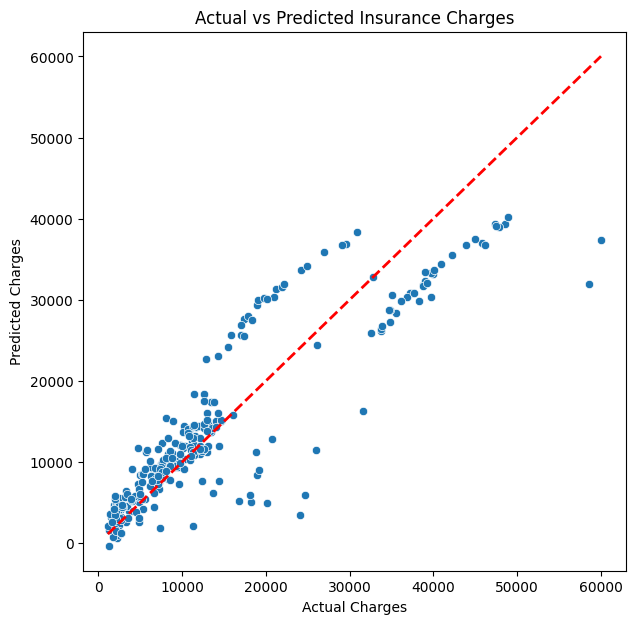

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))

sns.scatterplot(x='actual', y='pred', data=comparison)

plt.plot([comparison['actual'].min(), comparison['actual'].max()],
         [comparison['actual'].min(), comparison['actual'].max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

This graph can be interpreted by dividing it into three distinct regions:

1. **(0,0) to (20,000, 20,000):** In this range, the predicted values closely align with the actual values, indicating high prediction accuracy.

2. **(10,000, 20,000) to (30,000, 40,000):** The actual values are generally higher than the predicted values, suggesting an underestimation by the model.

3. **(30,000, 25,000) to (50,000, 40,000):** The actual values tend to be lower than the predicted values, indicating an overestimation.

To evaluate the performance through a more statistical approach, RMSE (Root Mean Square Error) is calculated and analyzed.

## **4. RMSE**

### **Evaluation Metrics**

**RMSE (Root Mean Squared Error)** is one of the most widely used methods for evaluating and predicting **continuous variables**. Simply put, it represents the concept of **aggregating the errors** between actual and predicted values.

* **MAE (Mean Absolute Error)**: Calculates the average of the **absolute differences** between actual and predicted values. A lower value (closer to **0**) indicates a better model.
* **MSE (Mean Squared Error)**: Calculates the average of the **squared differences** between actual and predicted values. A lower value (closer to **0**) indicates a better model.
* **RMSE (Root Mean Squared Error)**: Represents the **square root of the MSE**. A lower value (closer to **0**) indicates better performance.
* **R-squared ($R^2$, Coefficient of Determination)**: A metric indicating how well the **independent variables** explain the **target variable**. It represents the **explanatory power** of the model, where a value closer to **1** indicates a better fit.

In [35]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, pred)
rmse

5684.927776334485

### **Model Evaluation Results**

An **RMSE of approximately 5,684** was obtained for this model.

Since **RMSE** aggregates the prediction errors, a **lower value** generally indicates **superior predictive power**. However, because the magnitude of RMSE is **relative** to the scale of the target variable, it is best used for **comparative analysis**. By applying various modeling techniques to the same dataset and comparing their results, the model with the **lowest RMSE** can be identified as the one with the most **optimal predictive performance**.

## **5. R-squared ($R^2$) Analysis**

The **R-squared ($R^2$)** value, also known as the **Coefficient of Determination**, was calculated to evaluate the model's performance.

This metric indicates the proportion of the **variance** in the target variable that is predictable from the **independent variables**. In other words, it represents the **explanatory power** of the model. The value ranges from 0 to 1, where a value **closer to 1** signifies that the model fits the data well and has high predictive reliability. For this project, $R^2$ serves as a key indicator of how effectively the chosen features explain the fluctuations in **insurance premiums**.

In [36]:
model.score(X_train, y_train)

0.7368220127747351

The model achieved an **$R^2$ value of 0.736**.

Since **$R^2$** is a ratio, its value ranges up to a maximum of **1**. A value closer to 1 indicates a **superior model fit**. In general, an $R^2$ score between **0.7 and 0.8 or higher** is considered a **reliable and solid figure** in many practical contexts. Achieving **0.736** suggests that the independent variables effectively explain approximately **73.6% of the variance** in insurance premiums, demonstrating that the model has **respectable predictive power**.

## **6. Understanding the Linear Regression**

### 1. Definition of Linear Regression
**Linear Regression** is a statistical and machine learning technique used to find the **best-fitting straight line** that explains the relationship between a dependent variable ($y$) and one or more independent variables ($x$).

For instance, considering that weight generally increases as height increases, we can observe a **linear trend** even if the data points do not form a perfectly straight line. Linear regression identifies the optimal line to predict the target value based on these inputs.

### 2. The Linear Equation
The model is represented by the following formula:
$$y = ax + b$$

* **$y$ (Target Variable):** The outcome or result you are trying to predict (e.g., Weight).
* **$x$ (Feature):** The input or causal variable (e.g., Height).
* **$a$ (Coefficient / Slope):** Represents how much $y$ changes for every unit change in $x$.
* **$b$ (Intercept):** The value of $y$ when $x$ is zero.



### 3. How the Model Learns
In Machine Learning, finding the "best" line means finding the parameters ($a$ and $b$) that minimize the **Loss Function**.

* **Loss Function:** A function that measures the error between the actual data points and the values predicted by the model.
* **Optimization:** The model iteratively adjusts $a$ and $b$ to reach the point where the error (loss) is at its minimum, resulting in the most accurate prediction line.

### 4. Key Takeaways
- It models the **overall trend** of data, even if the relationship isn't perfectly proportional.
- It is primarily used for **prediction** and understanding the strength of relationships between variables.

### 5. Interpretation of Coefficients

In [37]:
pd.Series(model.coef_, index = X.columns)

,0
age,264.799803
sex,17.344661
bmi,297.514806
children,469.339602
smoker,23469.280173


The following values represent the **slopes (coefficients)** for each variable, indicating how much the **target variable (charges)** changes with a one-unit increase in each feature:

* **Age**: For every **1-year increase** in age, the insurance **charges increase by approximately 264.8**. This suggests a positive correlation between aging and medical costs.
* **Sex**: Since this is a binary variable (0 or 1), the coefficient indicates that **males (1)** typically incur **17.0 more in charges** compared to **females (0)**, holding other variables constant.
* **Smoker**: Being a **smoker (1)** has the most significant impact, with charges being approximately **23,459 higher** than those for **non-smokers (0)**.

This analysis highlights that **smoking status** is the most influential factor in determining insurance premiums within this dataset.

### 6. The Intercept (y-intercept)

In [38]:
model.intercept_

np.float64(-11576.999976112367)

The value above represents the **y-intercept (constant term)** of the linear equation.

In a regression model, the **intercept** is the expected mean value of the target variable when all **independent variables are set to zero**. While some features (like age or BMI) cannot realistically be zero in a practical sense, the intercept serves as the **mathematical baseline** for the entire model, ensuring that the predictions are properly centered and aligned with the actual data distribution.